## Feature Engineering (FE) & EDA Assignment 4 

## Financial Markets

### Author: Chloe Du (jd3631)



### a) Paper Reading 

##### Early Detection of Insider Trading in Option Markets

This article mainly talks about the detection of insider trading in opttion markets. 

Firstly, we need to define what is the illegal insider trading. Criminal insider trading is highly likely to occur when there was a willful and fraudulent buying or selling of a security or when the selling occured in breach of a fiduciary duty or otther relationship of trust and confidence or when the selling occurred while in possession of and in use of material nonpublic information about that security.

Generally, SEC detect the illegal behavior by monitoring the trading volumes of any particular sttock. The phenomenon of an increase of volumes commonly happened after material news is issued to the public, but if there is no such information provided and a dramatical increase of trading volumes, then this is suspicious.

In the option markets, investors generally consider options as leverage to amplify their gains, so this also attracts many insider traders. Firstly, a jump in the volume of calls traded indicates good news and puts indicate bad news.Seconsly, based on the rule that higher return comes from near-term options and inside information is usually leaked in recent months, so it is necessary to focus on the trading volume with near-term expiration date. Then, imbalance in the volume of calls to the colume of puts also releases some signals.

According to the two cases discussed in this paper, I learned that 1) when there is potentially a abnormal phenomenon, either call or put will have a abnormal volume and the other will perform normally.(There should be a comparison) 2) if the options trading market performed abnormally in few days  preceeding the official information released, we could suspect if there is illegal insider trading. 

As for data sources and preparation, I learned that 1) we should think of problems at a company level instead of a series level, which means we need to read the data, the trade dates in the context of company's recent history. 2) to create new features, we could focus on the moving average as a baseline (which will be used in analysis of implied volatility, distribution high volume detection).

### (b) Exploratory Data Analysis (EDA)

The stock I will analyze is Bristol-Myers Squibb(BMY), a pharmaceutical company, since there was news in the last few months about a scandal in the Senate that the senator couple sold millions of dollars in stock amid the coronavirus pandemic. Therefore, I would like to explore if there were ilegal insider trading in the stock she sold.

#### Part 1:Read the data

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
from datetime import datetime

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import plotly
import cufflinks as cf
cf.go_offline()

In [5]:
# Set up End and Start times for data grab. Here, I will explore one-year data. 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
BMY = data.DataReader("BMY", 'yahoo', start, end)

In [7]:
BMY[:10]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-28,45.400002,44.919998,45.380001,45.349998,15627000.0,43.901295
2019-07-01,46.290001,45.419998,45.709999,46.180000,14061100.0,44.704781
2019-07-02,46.680000,46.180000,46.459999,46.680000,10957000.0,45.188808
2019-07-03,46.599998,46.230000,46.490002,46.560001,6121500.0,45.472034
2019-07-05,46.669998,45.869999,46.529999,45.889999,9635600.0,44.817692
2019-07-08,45.830002,45.299999,45.720001,45.770000,11884000.0,44.700497
2019-07-09,46.369999,45.700001,45.849998,46.040001,9456700.0,44.964188
2019-07-10,46.139999,45.750000,46.040001,45.959999,8807200.0,44.886055
2019-07-11,45.889999,44.169998,45.880001,44.529999,23338400.0,43.489468


In [8]:
BMY.shape

(252, 6)

In [9]:
#Summary Stats
BMY.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,56.823889,55.535437,56.152936,56.189246,1.544360e+07,55.552426
std,6.974059,6.933729,6.933817,6.901250,1.237501e+07,7.151386
min,43.070000,42.480000,42.810001,42.770000,2.890400e+06,41.770596
25%,50.489999,49.270000,49.935000,49.815001,1.084810e+07,48.801453
50%,58.040001,56.555000,57.219999,57.475000,1.373450e+07,56.825176
75%,62.667500,60.942499,61.770000,61.770000,1.746440e+07,61.555529
max,68.339996,67.220001,67.910004,67.430000,1.854132e+08,66.876488


In [10]:
#General info
BMY.info()
# I will use adjusted close for the following steps 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-06-28 to 2020-06-26
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Text(0.5, 1.0, 'BMY')

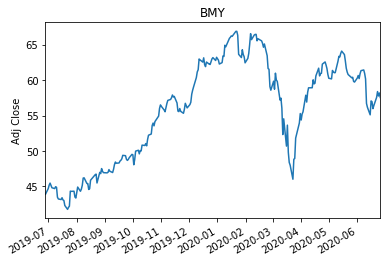

In [11]:
# have a general look at a historical view of closing price
BMY['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title('BMY')
# in the figure, we could find there seems to br a pump-dump between 2020-01 and 2020-03

In [12]:
# candle plot
BMY[['Open', 'High', 'Low', 'Adj Close']].iplot(kind='candle')

The drop is caused by the official annocement of conorvirus-19 spreading widely across USA.

Text(0.5, 1.0, 'BMY')

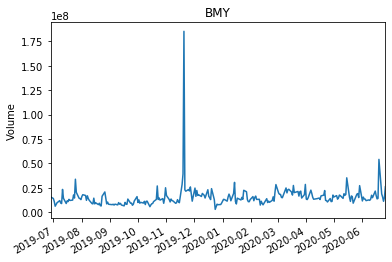

In [13]:
# check the total volume of stock being treaded each day
BMY['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title('BMY')
# we could find the volume traded at a point between 2019-11 and 2020-01 is unusually high

Explore more with the volume, unusual amount of volume traded suggests unusual transactions.Here, we showed the unusual transactions for each month

In [14]:
BMY.reset_index(inplace=True)

In [15]:
BMY['Year'] =BMY['Date'].apply(lambda x:str(x.year))
BMY['Month'] =BMY['Date'].apply(lambda x:str(x.month))
BMY['Year-Month'] = BMY['Year'].str.cat(BMY['Month'],sep='-')

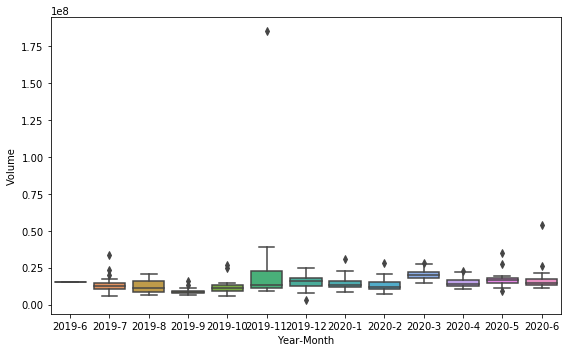

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Volume', x= 'Year-Month', data=BMY)
plt.tight_layout()

In [17]:
BMY.set_index('Date',inplace=True)

Then we could find out it is 2019-11-20 when the unusual volume happened. On that day, Bristol-Myers Squibb announced that the it has successfully completed its acquisition of Celgene Corporation (NASDAQ:CELG) and its Board of Directors has authorized the repurchase of 7 billion dollars of Bristol-Myers Squibb common stock.In connection with this authorization, Bristol-Myers Squibb has entered into accelerated share repurchase (ASR) agreements to repurchase, in aggregate, $7 billion of Bristol-Myers Squibb common stock, accounting for 80 percent of the share. 

Therefore,we could focus on the stock performance serveral days before the official annacement is released to see if there is anything abnormal or illegal insider trading caused by information leak. And we could find during some days in October in 2019, there is abnormal trading volume, this may be related to the insider trading.

In [18]:
print(BMY['Volume'].max());
BMY[BMY['Volume'] == 185413200.0]

185413200.0


,High,Low,Open,Close,Volume,Adj Close,Year,Month,Year-Month
Date,,,,,,,,,
2019-11-20,56.5,55.299999,56.16,56.41,185413200.0,55.554737,2019,11,2019-11


#### peer comparison

In order to better understand the market, I will select out some peer stocks to make comparison (including HLUYY, INVA, ABBV)

In [19]:
HLUYY = data.DataReader("HLUYY", 'yahoo', start, end)

In [20]:
INVA = data.DataReader("INVA", 'yahoo', start, end)

In [21]:
ABBV = data.DataReader("ABBV", 'yahoo', start, end)

In [22]:
tickers = ['BMY', 'HLUYY', 'INVA','ABBV']

In [23]:
stocks = pd.concat([BMY, HLUYY, INVA, ABBV],axis=1,keys=tickers)

In [24]:
stocks.columns.names = ['Stock Ticker','Stock Info']

In [25]:
stocks.head()

Stock Ticker        BMY                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2019-06-28    45.400002  44.919998  45.380001  45.349998  15627000.0   
2019-07-01    46.290001  45.419998  45.709999  46.180000  14061100.0   
2019-07-02    46.680000  46.180000  46.459999  46.680000  10957000.0   
2019-07-03    46.599998  46.230000  46.490002  46.560001   6121500.0   
2019-07-05    46.669998  45.869999  46.529999  45.889999   9635600.0   

Stock Ticker                                        HLUYY  ...   INVA         \
Stock Info    Adj Close  Year Month Year-Month       High  ...   Open  Close   
Date                                                       ...                 
2019-06-28    43.901295  2019     6     2019-6  39.419998  ...  14.27  14.56   
2019-07-01    44.704781  2019     7     2019-7  40.349998  ...  14.70  14.55   
2019-07-02    45.188808  2019     7     2019-7  40.599998  ...  14.57  14.43   
2019-07-03    45.472034  2019     7     2019-7  40.119999  ...  14.44  14.39   
2019-07-05    44.817692  2019     7     2019-7  40.500000  ...  14.35  14.40   

Stock Ticker                         ABBV                                   \
Stock Info    Volume Adj Close       High        Low       Open      Close   
Date                                                                         
2019-06-28    961300     14.56  72.739998  70.330002  70.580002  72.720001   
2019-07-01    636300     14.55  73.849998  72.279999  73.500000  73.400002   
2019-07-02    316100     14.43  74.250000  72.320000  73.199997  74.230003   
2019-07-03    329900     14.39  74.970001  73.779999  74.349998  74.959999   
2019-07-05    365700     14.40  74.790001  72.610001  74.650002  72.989998   

Stock Ticker                         
Stock Info        Volume  Adj Close  
Date                                 
2019-06-28    21381500.0  67.636238  
2019-07-01    18105500.0  68.268700  
2019-07-02    12862200.0  69.040672  
2019-07-03     7434100.0  69.719627  
2019-07-05    10854900.0  67.887352  

[5 rows x 27 columns]

In [26]:
stocks.xs(key='Close',axis=1,level='Stock Info').max()

Stock Ticker
BMY      67.430000
HLUYY    44.599998
INVA     15.260000
ABBV     97.790001
dtype: float64

In [27]:
returns = pd.DataFrame()

In [28]:
for tick in tickers:
    returns[tick+' Return'] = stocks[tick]['Adj Close'].pct_change()
returns.head()

,BMY Return,HLUYY Return,INVA Return,ABBV Return
Date,,,,
2019-06-28,NaN,NaN,NaN,NaN
2019-07-01,0.018302,0.021093,-0.000687,0.009351
2019-07-02,0.010827,-0.001493,-0.008247,0.011308
2019-07-03,0.006268,0.000000,-0.002772,0.009834
2019-07-05,-0.014390,0.006231,0.000695,-0.026281


According to the following figure, we could see they all show a positive relationship b/w each other. This suggests all these four shares followed overall market trend (pharmacy market).

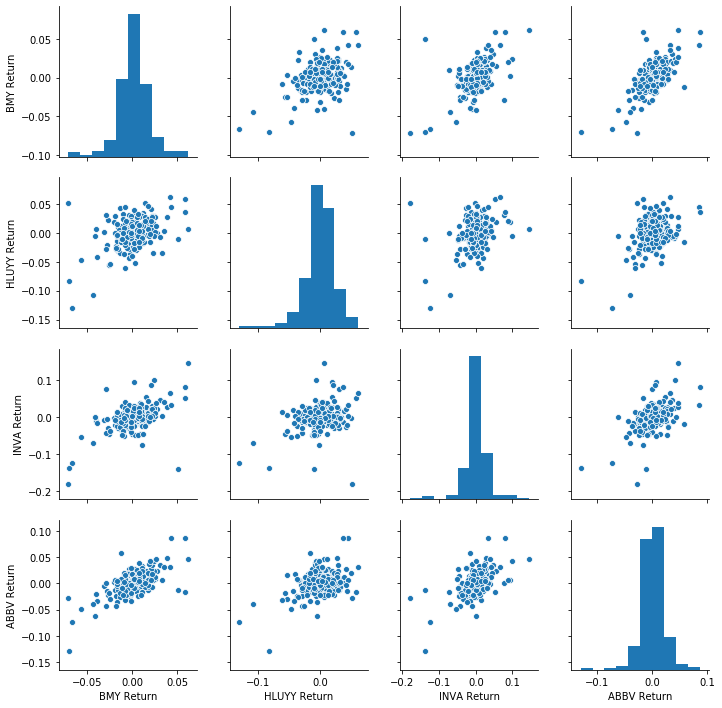

In [29]:
sns.pairplot(returns[1:])

Let's figure out on what dates each stock had the best and worst single day returns.We should notice that 2 of share the same day for the worst drop, and the worst drop day is close to each other for all four shares, then we could check anything significant happen that day? -- the outbreak of coronavirus-19.

In [30]:
# Worst Drop 
returns.idxmin()

BMY Return     2020-03-18
HLUYY Return   2020-03-12
INVA Return    2020-03-18
ABBV Return    2020-03-16
dtype: datetime64[ns]

We should have noticed that largest drop and biggest gain of all 4 shares were very close to one another, then we could check anythign significant happen in that time frame? -- USA government's intervention to save the stock.

In [31]:
# Best Single Day Gain
returns.idxmax()

BMY Return     2020-03-24
HLUYY Return   2020-04-06
INVA Return    2020-03-24
ABBV Return    2020-03-26
dtype: datetime64[ns]

Then, take a look at the standard deviation of the returns, which stock would we classify as the least risk over the entire time period? Then we could find BMY is the least risk and INVA is the riskest

In [32]:
returns.std()

BMY Return      0.017737
HLUYY Return    0.023534
INVA Return     0.032043
ABBV Return     0.021178
dtype: float64

Create a distplot using seaborn to explore more with these two shares (least risk and riskest)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



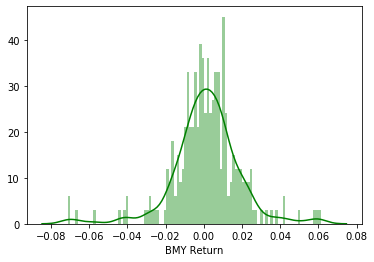

In [33]:
sns.distplot(returns['BMY Return'],color='green',bins=100)

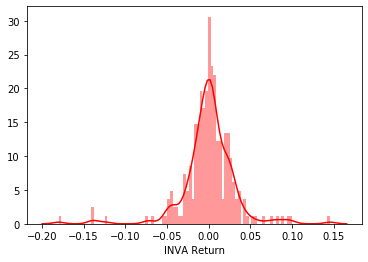

In [34]:
sns.distplot(returns['INVA Return'],color='red',bins=100)

To solely see the trend of return

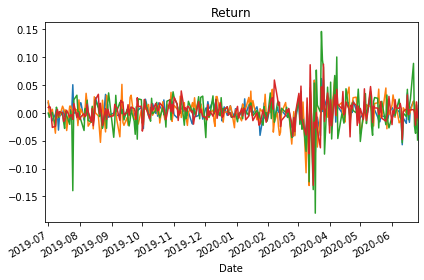

In [35]:
for tick in tickers:
    returns[tick+' Return'].plot()
    plt.title('Return')
    plt.tight_layout()


The return complies with the voliatale trend of each stock price. second We can see the four stock shows similiar trend of return, which suggests the overall market trend (eah stock show strong vibration during the march 2020, and during other periods, they vibrate within a fixed range, except INVA who shows a noticeably lowest return during August 2019)

Create a line plot showing adjusted close price for each stock for the entire index of time.

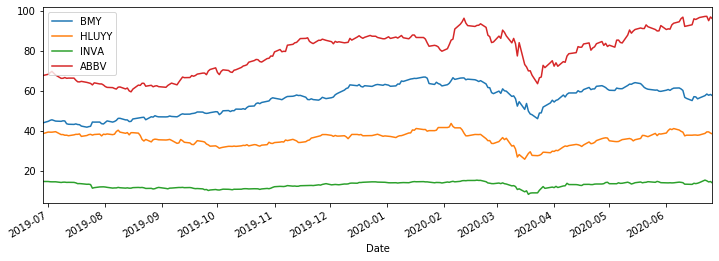

In [36]:
for tick in tickers:
    stocks[tick]['Adj Close'].plot(figsize=(12,4),label=tick)
plt.legend()

Create a heatmap of the correlation between the stocks Adjusted Close Price. 

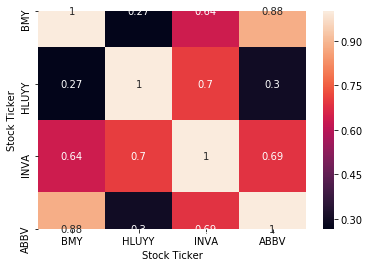

In [37]:
sns.heatmap(stocks.xs(key='Adj Close',axis=1,level='Stock Info').corr(),annot=True)

we could find that except for HLUYY, BMY is highly correlated to the other three, but anyways their mutual high correlations suggest a overall market trend.

#### Part 2: Feature Creation (technical indicators) & EDA

#### Moving Average

Moving averages can help us to identify trend directions and determine tthe support or resistance levels, so we can be clear about which way the price is moving.If the price is below MAs, the trnd is down; if above, is a up.

In [38]:
# I will select 5 days, 10 days, 20 ,50 as rolling bases.
ma_day = [5, 10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    BMY[column_name] = BMY['Adj Close'].rolling(ma).mean()

from the histogram for each features, we can see the general trend. 
(downtrend turns to be uptrend, but from MV50, we can see it is potentially downtrend later)

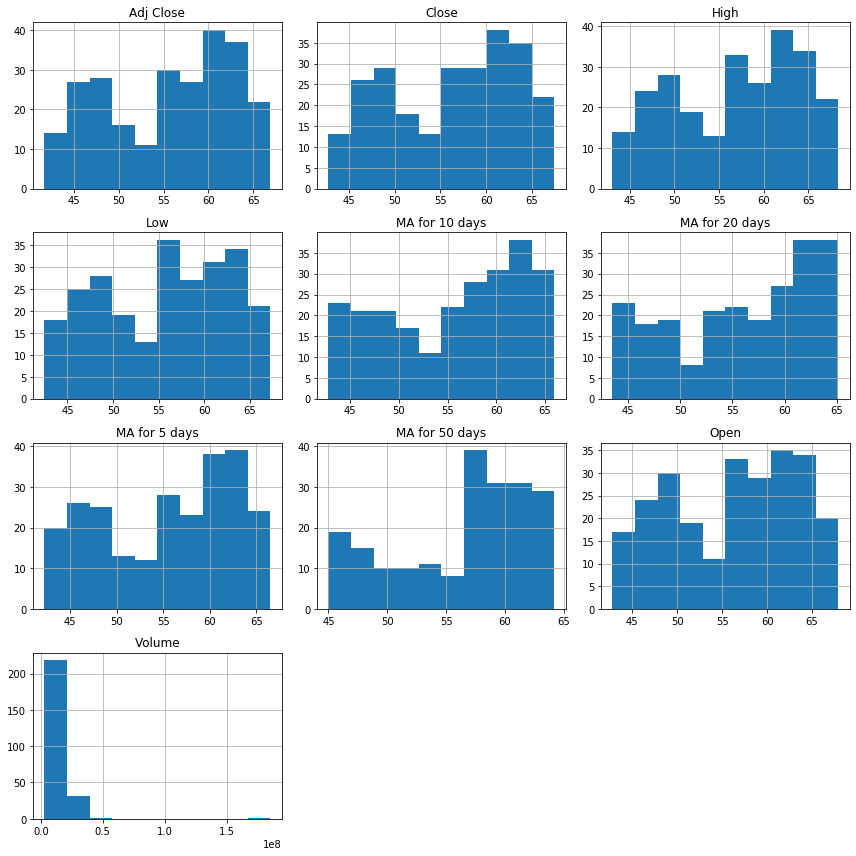

In [39]:
BMY.hist(figsize=(12, 12))
plt.tight_layout()

Then we could find out from the following line chart that: 1. 5-day base is too narrow to remove 'noise' and make overall trend direction unclear; 2. We can see this stock is shaking, untile the start of 2020,  20-day & 50-day MA acts as a support showing a upward trend, but followed by a down, then a slight up.

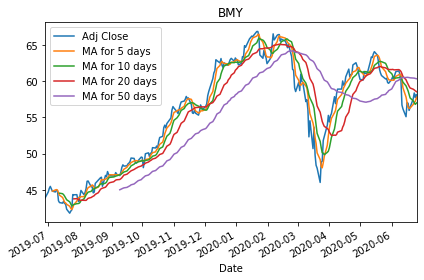

In [40]:
#plot the line chart
BMY[['Adj Close', 'MA for 5 days','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('BMY')
plt.tight_layout()

##### MACD (Moving Average Convergence Divergence)


The MACD is primarily used to gauge the strength of stock price movement. It does this by measuring the divergence of two exponential moving averages (EMAs), commonly a 12-period EMA and a 26-period EMA. A MACD line is created by subtracting the 26-period EMA from the 12-period EMA, and a line showing a nine-period EMA of that calculation is plotted over the MACD's basic representation as a histogram. A zero line provides positive or negative values for the MACD. Essentially, greater separation between the 12-period EMA, and the 26-period EMA shows increased market momentum, up or down.

In [41]:
# using pandas ewm(exponentially weighted moving) function
BMY['26_ema'] = BMY['Adj Close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
BMY['12_ema'] = BMY['Adj Close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
BMY['MACD'] = BMY['12_ema'] - BMY['26_ema']
BMY = BMY.fillna(0)

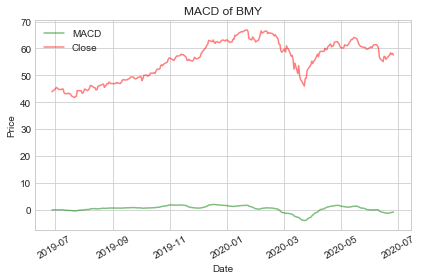

In [42]:
# Moving Average Convergence Divergence
plt.style.use('seaborn-whitegrid')
plt.plot(BMY.index, BMY['MACD'], 'green', label="MACD", alpha = 0.5)
plt.plot(BMY.index, BMY['Adj Close'], 'red', label="Close", alpha = 0.5)
plt.title("MACD of BMY" )
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=30)
plt.tight_layout()

We can see that these two charts are in line with the trend of stock prices. from macd line, Between November and March 2020, above the zero axis indicates bullish strength. If the continuous growth range of the slop decreases from large to small on the zero axis, the increase rate decreases. This is consistent with share price growth being volatile during this time. Similarly， between March and April 2020, short positions below the zero axis are strong. If the continuous growth range of the slop decreases from large to small under the zero axis, the decline is smaller. 

##### Triple Exponential Moving Average

making it easier to identify trends without the lag associated with traditional moving averages (MA). It does this by taking multiple exponential moving averages (EMA) of the original EMA and subtracting out some of the lag.TEMA can signal earlier than EMA and is more sensitive to price changes.

In [157]:
BMY['EMA'] = BMY['Adj Close'].ewm(span=3,min_periods=0,adjust=True,ignore_na=False).mean()
BMY = BMY.fillna(0)
BMY['TEMA'] = (3 * BMY['EMA'] - 3 * BMY['EMA'] * BMY['EMA']) + (BMY['EMA']*BMY['EMA']*BMY['EMA'])

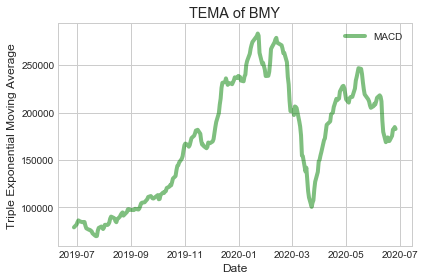

In [158]:
plt.plot(BMY.index, BMY['TEMA'], 'green', label="MACD", alpha = 0.5)
plt.title("TEMA of BMY" )
plt.legend()
plt.xlabel("Date")
plt.ylabel("Triple Exponential Moving Average")
plt.tight_layout()

Then we should notice this complies with the trend of stock price. nothing abnormal.

##### Relative Strength Index

The RSI aims to indicate whether a market is considered to be overbought or oversold in relation to recent price levels. The RSI calculates average price gains and losses over a given period of time; the default time period is 14 periods. 

In [159]:
# Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
# Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
#        PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [160]:
# Add Momentum_1D column
# Momentum_1D = P(t) - P(t-1)

BMY['Momentum_1D'] = (BMY['Adj Close']-BMY['Adj Close'].shift(1)).fillna(0)
BMY['RSI_14D'] = BMY['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning



In [161]:
import plotly.express as px
fig = px.line(BMY, x=BMY.index, y=BMY['RSI_14D'])
fig.add_shape( type="line", x0='2019-06',y0=30,x1='2020-08',y1=30, 
              line=dict(color="LightSeaGreen",width=1))
fig.add_shape(type="line", x0='2019-06', y0=70, x1='2020-08', y1=70, 
              line=dict(color="LightSeaGreen",width=1))
fig.update_layout(title={'text': "BMY",'y':0.95,'x':0.5,'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title='Date',yaxis_title='Relative Strength Index')
fig.show()

Values over 70 are considered indicative of a market being overbought (here, about in september and october 2019, jan 2020 - should invetegate more about what happened around these days) in relation to recent price levels, and values under 30 are indicative of a market that is oversold (noticeably july 2019 and march 2020). On a more general level, readings above 50 are interpreted as bullish, and readings below 50 are interpreted as bearish. 

Then, I am thinking about the market is overbought between 2019-10-23 and 2019-10-30, does it indicate a insider trading since this happened just one month before the acquisition announcement. Moreover, it also shows that the market is oversold at the end of Feb (just few days before the Conorvirus outbreak), this may also related to the illegal insider trading. (maybe the senator leaked the information)

##### Bollinger Bands

 Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price.Bollinger bands help determine whether prices are high or low on a relative basis. They are used in pairs, both upper and lower bands and in conjunction with a moving average.

In [162]:
def bbands(price, length=30, numsd=2):
    #returns average, upper band, and lower band
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [163]:
BMY['BB_Middle_Band'], BMY['BB_Upper_Band'], BMY['BB_Lower_Band'] = bbands(BMY['Adj Close'], length=20, numsd=1)
BMY['BB_Middle_Band'] = BMY['BB_Middle_Band'].fillna(0)
BMY['BB_Upper_Band'] = BMY['BB_Upper_Band'].fillna(0)
BMY['BB_Lower_Band'] = BMY['BB_Lower_Band'].fillna(0)
BMY.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,26_ema,12_ema,MACD,EMA,TEMA,Momentum_1D,RSI_14D,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band
Date,,,,,,,,,,,,,,,,,,,,
2020-06-22,57.689999,55.919998,56.240002,57.560001,18716200.0,57.560001,56.790001,57.302,58.9035,60.4452,58.874284,57.716439,-1.157845,56.979304,175422.361372,1.150002,44.725747,58.904,61.017,56.790
2020-06-23,59.099998,57.820000,57.939999,58.380001,15557200.0,58.380001,57.054001,57.047,58.8065,60.4344,58.837671,57.818526,-1.019145,57.679652,182089.087484,0.820000,42.966959,58.807,60.896,56.717
2020-06-24,58.209999,57.110001,58.110001,57.759998,11177200.0,57.759998,57.216000,56.807,58.6745,60.3888,58.757843,57.809521,-0.948322,57.719825,182476.538904,-0.620003,44.881174,58.675,60.742,56.607
2020-06-25,58.470001,57.700001,58.009998,58.180000,15267200.0,58.180000,57.658000,56.954,58.5930,60.3632,58.715040,57.866518,-0.848522,57.949913,184706.229238,0.420002,44.780221,58.593,60.645,56.541
2020-06-26,58.020000,56.669998,57.959999,57.540001,26131800.0,57.540001,57.884000,57.091,58.4840,60.3228,58.628000,57.816285,-0.811715,57.744957,182719.201094,-0.639999,49.832402,58.484,60.531,56.437


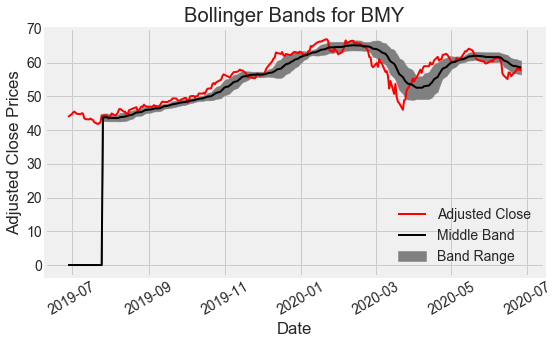

In [164]:
#plot
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
plt.fill_between(BMY.index, BMY['BB_Upper_Band'], BMY['BB_Lower_Band'], color='grey', label="Band Range")
# Plot Adjust Closing Price and Moving Averages
plt.plot(BMY.index, BMY['Adj Close'], color='red', lw=2, label="Adjusted Close")
plt.plot(BMY.index, BMY['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
plt.title("Bollinger Bands for BMY")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Adjusted Close Prices")
plt.xticks(rotation=30)
plt.tight_layout()

When the markets become more volatile the bands widen(2020-03 to 2020-05); during less volatile periods, the bands contract.The closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market. 

This figure can also tells us some information about the market is oversold/overbought during some senstive periods. （Before and after the acquisition, before the conorvirus outbreak）

##### Acceleration Bands

The Acceleration Bands measure volatility over a user-defined number of bars (default is often the past 20 bars). They are plotted using a simple moving average as the midpoint, with the upper and lower bands being of equal distance from the midpoint, similar to Bollinger Bands. Similar to Bollinger Bands, the Acceleration Bands will become wider the more volatile the stock has been and narrower the less volatile it’s been.It interpreted a buy signal after two consecutive closes above the acceleration band. Once the price closes back within the Acceleration Bands, this is taken as a signal that the acceleration period is over and it’s best to close out the trade.

In [165]:
def abands(df):
    df['AB_Middle_Band'] = df['Adj Close'].rolling(window = 20, center=False).mean()
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [166]:
abands(BMY)
BMY = BMY.fillna(0)

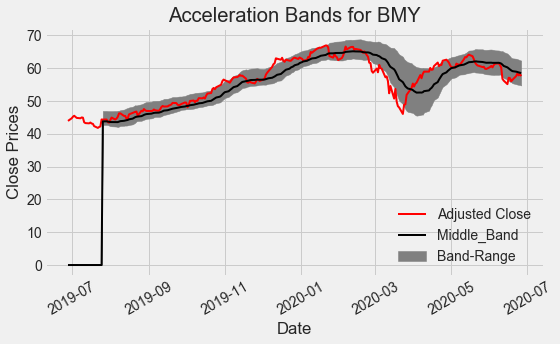

In [167]:
# Acceleration band Plot
plt.figure(figsize=(8,5))
plt.fill_between(BMY.index, BMY['AB_Upper_Band'], BMY['AB_Lower_Band'], color='grey', label = "Band-Range")
# Plot Adjust Closing Price and Moving Averages
plt.plot(BMY.index, BMY['Adj Close'], color='red', lw=2, label = "Adjusted Close")
plt.plot(BMY.index, BMY['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
plt.title("Acceleration Bands for BMY")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Prices")
plt.xticks(rotation=30)
plt.tight_layout()

##### Aroon Oscillator

The Aroon Oscillator is a trend-following indicator that uses aspects of the Aroon Indicator (Aroon Up and Aroon Down) to gauge the strength of a current trend and the likelihood that it will continue. Readings above zero indicate that an uptrend is present, while readings below zero indicate that a downtrend is present. Traders watch for zero line crossovers to signal potential trend changes. They also watch for big moves, above 50 or below -50 to signal strong price moves.

In [168]:
BMY.reset_index(inplace = True)

In [169]:
#Aroon Up and Aroon Down measure the number of periods since the last 25-period high and low.
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [170]:
listofzeros = [0] * 25
up, down = aroon(BMY)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * BMY
    BMY['Aroon_Oscillator'] = aroon_list.shape[0]
else:
    BMY['Aroon_Oscillator'] = listofzeros+aroon_list

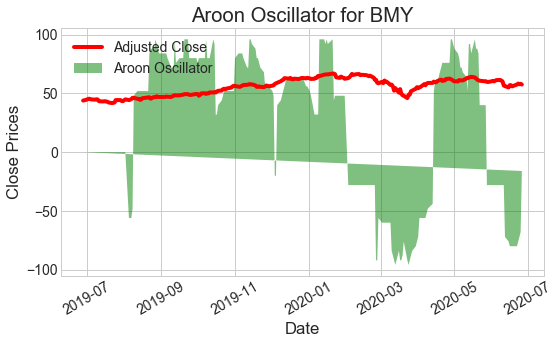

In [171]:
# Aroon Oscillator Plot
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,5))
plt.fill(BMY['Date'], BMY['Aroon_Oscillator'],'g', alpha = 0.5, label = "Aroon Oscillator")
plt.plot(BMY['Date'], BMY['Adj Close'], 'r', label="Adjusted Close")
plt.title("Aroon Oscillator for BMY")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Prices")
plt.xticks(rotation=30)
plt.tight_layout()

It correctly caught the uptrend in stocks from 2019-08 to2020-02 and accurately predicted a deceleration and reversal of the trend before the outbreak of conorvirus happened at March, and then a bounce intervened by government, but for the future, it is bearish. 

In [172]:
BMY.set_index('Date',inplace = True)

##### Price Volume Trend

The volume price trend indicator is used to determine the balance between a security’s demand and supply. The percentage change in the share price trend shows the relative supply or demand of a particular security, while volume indicates the force behind the trend.

In [173]:
#PVT = [((CurrentClose - PreviousClose) / PreviousClose) x Volume] + PreviousPVT
BMY["PVT"] = (BMY['Momentum_1D']/ BMY['Adj Close'].shift(1))*BMY['Volume']
BMY["PVT"] = BMY["PVT"] + BMY["PVT"].shift(1)
BMY["PVT"] = BMY["PVT"].fillna(0)

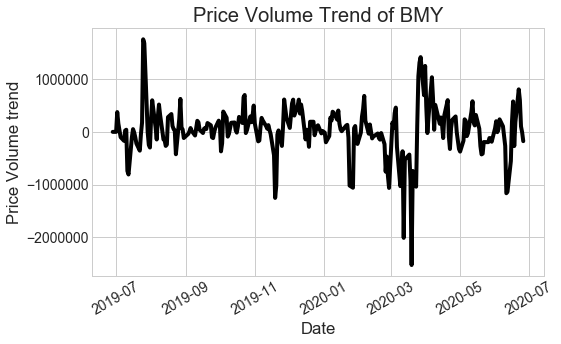

In [174]:
# PRice Volume Trend Plot
plt.figure(figsize=(8,5))
plt.plot(BMY.index, BMY['PVT'], 'black')
plt.title("Price Volume Trend of BMY")
plt.xlabel("Date")
plt.ylabel("Price Volume trend")
plt.xticks(rotation=30)
plt.tight_layout()

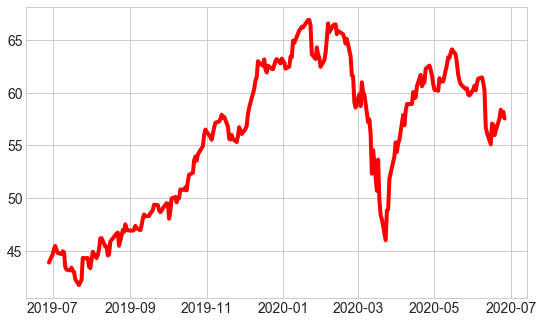

In [175]:
plt.figure(figsize=(8,5))
plt.plot(BMY.index, BMY['Adj Close'], 'red')

PVT can also identify potential trend reversals.  PVT is a more accurate representation of market conditions because of the fact that the volume is price adjusted. Frequently, PVT mirrors market price movements very closely.This indicator can indicate a potential reversal. Especially considering the premise behind the PVT indicator which is positive and negative price adjusted volume swings precede changes in price. 

Then, we could see about at the end of July, although the price is very low but it shows a noticably high price volume trend, this may be because of increasing demand caused by the bounce of stock price. Second, about some days before the acquisition (2019-11-20), we could see a noticeably low price volume trend, this suggests increasing supply and we could suspect that someone knows the inside information related to acquisition and was certain about that the stock  price would go up due to the acquistion. this can be considered as ilegal insider trading.

##### On Balance Volume

Since volume was the key force behind markets, OBV ( as a cumulative indicator that adds volume on up days and subtracts volume on down days) is designed to project when major moves in the markets would occur based on volume changes.It indicates whether this volume is flowing in or out of a given security or currency pair. The OBV is a cumulative total of volume (positive and negative).

If the closing price is above the prior close price then: Current OBV = Previous OBV + Current Volume

If the closing price is below the prior close price then: Current OBV = Previous OBV - Current Volume

If the closing prices equals the prior close price then: Current OBV = Previous OBV (no change)

In [176]:
new = (BMY['Volume'] * (~BMY['Adj Close'].diff().le(0) * 2 -1)).cumsum()
BMY['OBV'] = new

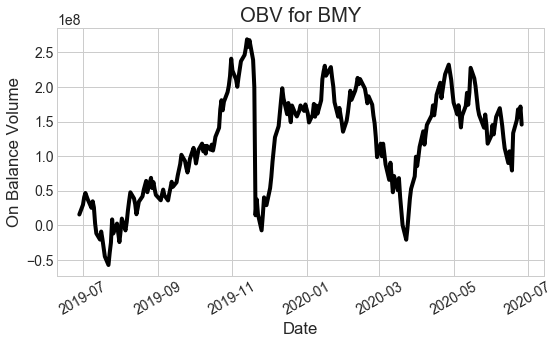

In [177]:
plt.figure(figsize=(8,5))
plt.plot(BMY.index, BMY['OBV'], 'black')
plt.title("OBV for BMY")
plt.xlabel("Date")
plt.ylabel("On Balance Volume")
plt.xticks(rotation=30)
plt.tight_layout()

During a trading range, if the OBV is rising, accumulation may be taking place—a warning of an upward breakout.
During a trading range, if the OBV is falling, distribution may be taking place—a warning of a downward breakout.
When price continues to make higher peaks and OBV fails to make higher peaks, the upward trend is likely to stall or fail.

##### Money Flow Index

The Money Flow Index (MFI) is an oscillator that uses both price and volume to measure buying and selling pressure.Money flow is positive when the typical price rises (buying pressure) and negative when the typical price declines (selling pressure). A ratio of positive and negative money flow is then plugged into an RSI formula to create an oscillator that moves between zero and one hundred.MFI is best suited to identify reversals and price extremes with a variety of signals.

In [178]:
def MFI(df):
    # typical price
    df['tp'] = (df['High']+df['Low']+df['Close'])/3
    #raw money flow
    df['rmf'] = df['tp'] * df['Volume']
    # positive and negative money flow
    df['pmf'] = np.where(df['tp'] > df['tp'].shift(1), df['tp'], 0)
    df['nmf'] = np.where(df['tp'] < df['tp'].shift(1), df['tp'], 0)
    # money flow ratio
    df['mfr'] = df['pmf'].rolling(window=14,center=False).sum()/df['nmf'].rolling(window=14,center=False).sum()
    df['Money_Flow_Index'] = 100 - 100 / (1 + df['mfr'])

In [179]:
MFI(BMY)
BMY = BMY.fillna(0)

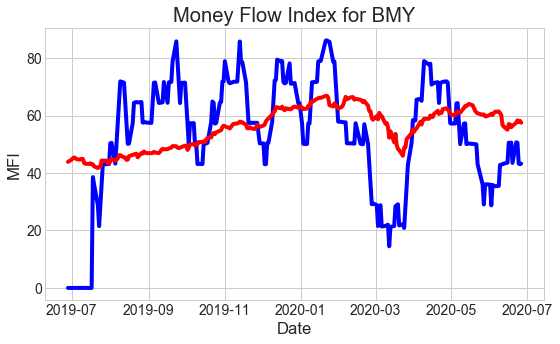

In [183]:
plt.figure(figsize=(8,5))
plt.plot(BMY.index, BMY['Money_Flow_Index'], 'blUE',label="Money Flow Index")
plt.plot(BMY.index, BMY['Adj Close'], 'red', label="Adj Close")
plt.title("Money Flow Index for BMY")
plt.xlabel("Date")
plt.ylabel("MFI")
plt.tight_layout()

MFI > 80 represents the short-term overheating of funds signal. However, it will have to wait for the MFI to fall below 80 again before confirmation of the funds' turn.

2When MFI < 20, it represents short-term cooling signal of funds. However, it will have to wait for the MFI index to break above 20 again before confirmation of the funds' turn.

MFI at the level of about 80, there are lower than the top, and the stock price "deviated" phenomenon, can be regarded as the signal of the medium-term reversal of the decline.

MFI at the level of about 20, there is a bottom higher than a bottom, and the stock price "deviated" phenomenon, can be regarded as the signal of the medium-term reversal of the rise.

This chart does reflect the trend of stock price.

In [181]:
# drop unwanted columns to make datafrmae clear
columns2Drop = ['Momentum_1D', 'aupband', 'adownband','26_ema', '12_ema',  'EMA', 'tp','rmf','pmf','nmf','mfr']
BMY = BMY.drop(labels = columns2Drop, axis=1)

In [182]:
# all the features I create
BMY.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band,Aroon_Oscillator,PVT,OBV,Money_Flow_Index
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-22,57.689999,55.919998,56.240002,57.560001,18716200.0,57.560001,56.790001,57.302,58.9035,60.4452,...,58.904,61.017,56.790,58.9035,62.847013,55.084515,-80.0,807128.219660,152095900.0,50.686681
2020-06-23,59.099998,57.820000,57.939999,58.380001,15557200.0,58.380001,57.054001,57.047,58.8065,60.4344,...,58.807,60.896,56.717,58.8065,62.721461,54.971463,-76.0,603185.349039,167653100.0,50.575972
2020-06-24,58.209999,57.110001,58.110001,57.759998,11177200.0,57.759998,57.216000,56.807,58.6745,60.3888,...,58.675,60.742,56.607,58.6745,62.574348,54.901851,-72.0,102924.618213,156475900.0,43.296084
2020-06-25,58.470001,57.700001,58.009998,58.180000,15267200.0,58.180000,57.658000,56.954,58.5930,60.3632,...,58.593,60.645,56.541,58.5930,62.394958,54.854960,-68.0,-7687.744090,171743100.0,43.079306
2020-06-26,58.020000,56.669998,57.959999,57.540001,26131800.0,57.540001,57.884000,57.091,58.4840,60.3228,...,58.484,60.531,56.437,58.4840,62.299056,54.694058,-16.0,-176443.021443,145611300.0,43.275948


In a conclusion, we need to focus on when the market got abnormal volume so as to learn anything happened on those days. And then we could investigate how the relationship between price and volume before or after these sensitive days through some technical indicatores to explore if there is suspicion of abnormal trading. Moreover, to survilie a market, we could also check some of its peer stocks to see the overall market trend and to make some comparison to see if this stock perform differently with others.  For BMY, the date we should focus on is its acquisition date. 

### END